In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

path_to_data = '/home/gterren/dynamic_update/validation/'

param_names_ = ['forget_rate_f',
                'forget_rate_e',
                'length_scale_f',
                'length_scale_e',
                'lookup_rate',
                'trust_rate', 
                'nu', 
                'gamma', 
                'xi',
                'kappa_min', 
                'kappa_max']

param_symbols_ = [r'$\varepsilon_f$',
                  r'$\varepsilon_e$',
                  r'$\lambda_f$',
                  r'$\lambda_e$',
                  r'$\beta$',
                  r'$\alpha$', 
                  r'$\nu$', 
                  r'$\rho$', 
                  r'$\xi$',
                  r'$\kappa_{\min}$', 
                  r'$\kappa_{\max}$']

In [ ]:
#param_name = ['forget_rate_e', 'lookup_rate', 'length_scale_e', 'xi', 'gamma', 'kappa_min', 'kappa_max'][6]
#param_name = ['forget_rate_f', 'length_scale_f', 'gamma', 'xi', 'kappa_min', 'kappa_max'][5]
param_name = ['forget_rate_f', 'forget_rate_e', 'lookup_rate', 'length_scale_f', 'length_scale_e', 
              'trust_rate', 'nu', 'xi', 'gamma', 'kappa_min', 'kappa_max'][6]
time = 120

df_ = pd.read_csv(path_to_data + f'validation_ffc-solar-WIS-{param_name}.csv')

df_ = df_[['asset', 
           'day', 
           'time', 
           param_name, 
           'WIS_f']]

df_p_ = df_.loc[df_['time'] == time]
print(df_.shape)

# df_ = df_.groupby(['asset', 
#                    param_name]).agg({'WIS_f': 'median'}).reset_index(drop = False)

df_p_ = df_p_.groupby([param_name]).agg({'WIS_f': 'median'}).reset_index(drop = False)
print(df_p_)

(261360, 5)
      nu     WIS_f
0    1.0  0.022194
1    2.0  0.021803
2    3.0  0.021634
3    4.0  0.021518
4    5.0  0.021477
5    6.0  0.021469
6    8.0  0.021431
7   10.0  0.021414
8   12.0  0.021421
9   14.0  0.021440
10  16.0  0.021431
11  18.0  0.021415


In [25]:
df_ = pd.read_csv(path_to_data + f'validation_envelop-wind.csv')
print(df_.shape)

time  = 144
alpha = 0.4

df_ = df_.loc[df_['time'] == time].reset_index(drop=True)
df_ = df_.loc[df_['alpha'] == alpha].reset_index(drop=True)
print(df_.shape)

df_ = df_.groupby(['distance', 'time', 'fraction']).agg({'WIS': 'mean', 'FCS': 'mean'}).reset_index(drop = False)
print(df_)


(1393920, 11)
(174240, 11)
   distance  time  fraction        WIS       FCS
0      fknn   144     0.100  61.182645  0.420829
1      fknn   144     0.175  60.178927  0.561749
2      fknn   144     0.250  61.462037  0.638235
3      fknn   144     0.325  63.966496  0.699352
4      fknn   144     0.400  66.631143  0.740627
5      fknn   144     0.475  70.073012  0.778610
6      fknn   144     0.550  73.261052  0.805714
7      fknn   144     0.625  76.561867  0.827899
8      fknn   144     0.700  80.266313  0.847481
9      fknn   144     0.775  83.436686  0.862117
10     fknn   144     0.850  86.572479  0.873480
11     fknn   144     0.925  88.739314  0.880411
12      sup   144     0.100  61.109319  0.393038
13      sup   144     0.175  58.849725  0.533084
14      sup   144     0.250  59.320317  0.612400
15      sup   144     0.325  61.292024  0.676642
16      sup   144     0.400  63.536828  0.721761
17      sup   144     0.475  66.474526  0.760214
18      sup   144     0.550  69.158819  0.

In [ ]:
time = 144

dfs_ = []
for param_name in param_names_[9:]:
    rs_ = pd.read_csv(path_to_data + f'validation_ffc-WIS-{param_name}-{time}.csv')
    print(param_name, rs_.shape)
    #rs_ = rs_.dropna()
    #print(param_name, rs_.shape)

    rs_ = rs_[[param_name, 'time', 'asset', 'day', 'WIS_eCDF']].rename(columns = {'WIS_eCDF': 'score'})

    df_ = []

    for asset in np.unique(rs_['asset']):
        idx_    = (rs_['time'] == time) & (rs_['asset'] == asset)
        rs_agg_ = rs_.loc[idx_].groupby([param_name]).agg('median').reset_index(drop = False)
        print(asset, rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name].to_numpy()[0], rs_agg_['score'].min())
        df_.append([time, asset, rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name].to_numpy()[0]])

    df_ = pd.DataFrame(df_, columns = ['time', 'asset', param_name])
    df_ = df_[['time', param_name]].groupby(['time']).agg('median').reset_index(drop = False)
    dfs_.append(df_)

dfs_         = pd.concat(dfs_, axis = 0).reset_index(drop = True).fillna(0)
dfs_         = dfs_.groupby(['time']).agg('sum').reset_index(drop = False).T
dfs_.columns = dfs_.iloc[0]
dfs_         = dfs_[1:]
print(dfs_)

kappa_min (43800, 17)
0 600 3.5983883676714346
1 350 3.892762563449952
2 600 5.005648644203163
3 600 2.051250407410261
4 300 5.551437875175812
5 600 3.2733915519642025
6 350 4.757150344457815
7 600 4.008158372408403
8 600 2.7867528107037
9 350 5.188754689705251
kappa_max (43800, 17)
0 2400 3.7278078585845646
1 800 4.197088599506924
2 2400 4.964953888374247
3 600 2.0670321743893108
4 200 5.542554482754909
5 200 3.2362981766471
6 1600 4.621494153121428
7 600 4.164094387809994
8 1600 2.6552870531774864
9 600 5.303546517052579
time       144.0
kappa_min  600.0
kappa_max  700.0


In [24]:
param_name = 'zeta_3'
time       = 72
depth      = 'DQ'

rs_wis_ = pd.read_csv(path_to_data + f'ffc_calibration-WIS-{time}-{param_name}-{depth}.csv')
rs_cs_ = pd.read_csv(path_to_data + f'ffc_calibration-CS-{time}-{param_name}-{depth}.csv')
print(rs_wis_[param_name].unique())

# print(rs_cs_.shape, rs_wis_.shape)
# print(rs_wis_.columns)
# rs_wis_ = rs_wis_[[param_name, 'WIS']]

# rs_wis_ = rs_wis_.groupby([param_name]).agg('median').reset_index(drop = False)
# print(rs_wis_)

[0.3]


(43800, 17)
(array([0, 1, 2, 3, 4]), array([ 2412,  1090,  6244, 33982,    72]))
    gamma     score
0     135  0.002397
1     150  0.002448
2     165  0.002467
3     180  0.002459
4     195  0.002448
5     210  0.002406
6     225  0.002425
7     240  0.002374
8     255  0.002355
9     270  0.002363
10    285  0.002335
11    300  0.002319


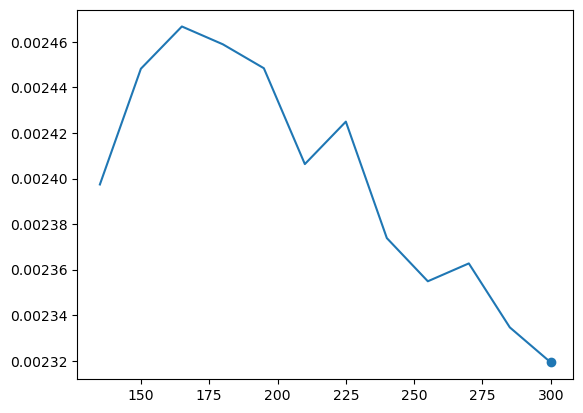

11    300
Name: gamma, dtype: int64


In [ ]:
param_name = 'gamma'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}_med-2.csv')
print(rs_.shape)
print(np.unique(rs_['status'], return_counts = True))

# idx_ = (rs_['time'] == 144) #& (rs_['status'] == 3) 
# rs_  = rs_.loc[idx_].reset_index(drop = True)
# print(rs_.shape)

rs_ = rs_[[param_name, 'WIS_eCDF']].rename(columns = {'WIS_eCDF': 'score'})

rs_agg_ = rs_.groupby([param_name]).agg('median').reset_index(drop = False)
print(rs_agg_)

plt.figure()
plt.plot(rs_agg_[param_name], rs_agg_['score'])
plt.scatter(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name], rs_agg_['score'].min())
#plt.ylim(0,)
plt.show()

print(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name])

(43800, 17)
(array([0, 1, 2, 3, 4]), array([ 6956,  1497,  7478, 18480,  9389]))
    forget_rate_f     score
0          0.0010  0.007345
1          0.0050  0.007156
2          0.0075  0.007057
3          0.0100  0.007027
4          0.0500  0.006504
5          0.0750  0.006196
6          0.1000  0.006036
7          0.2500  0.005978
8          0.5000  0.005906
9          0.7500  0.005835
10         1.0000  0.005819
11        10.0000  0.005828


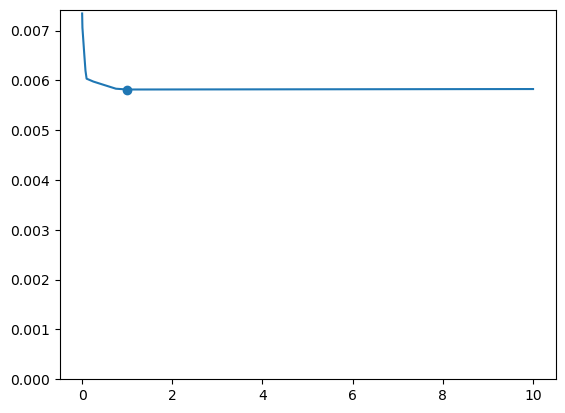

10    1.0
Name: forget_rate_f, dtype: float64


In [38]:
param_name = 'forget_rate_f'

rs_ = pd.read_csv(path_to_data + f'144/ffc_validation-WIS-{param_name}_med-2.csv')
print(rs_.shape)
print(np.unique(rs_['status'], return_counts = True))

# idx_ = (rs_['time'] == 144) #& ((rs_['status'] == 0) | (rs_['status'] == 3))
# rs_  = rs_.loc[idx_].reset_index(drop = True)
# print(rs_.shape)

rs_ = rs_[[param_name, 'WIS_eCDF']].rename(columns = {'WIS_eCDF': 'score'})

rs_agg_ = rs_.groupby([param_name]).agg('median').reset_index(drop = False)
print(rs_agg_)

plt.figure()
plt.plot(rs_agg_[param_name], rs_agg_['score'])
plt.scatter(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name], rs_agg_['score'].min())
plt.ylim(0,)
plt.show()

print(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name])

(43800, 17)
(array([0, 1, 2, 3, 4]), array([ 4139,   974,  5709, 29794,  3184]))
    length_scale_f     score
0          0.00050  0.011887
1          0.00075  0.011500
2          0.01000  0.011248
3          0.02500  0.011033
4          0.05000  0.010960
5          0.07500  0.010951
6          0.10000  0.010919
7          0.25000  0.011295
8          0.50000  0.012623
9          0.75000  0.013969
10         1.00000  0.015346
11         1.25000  0.016539


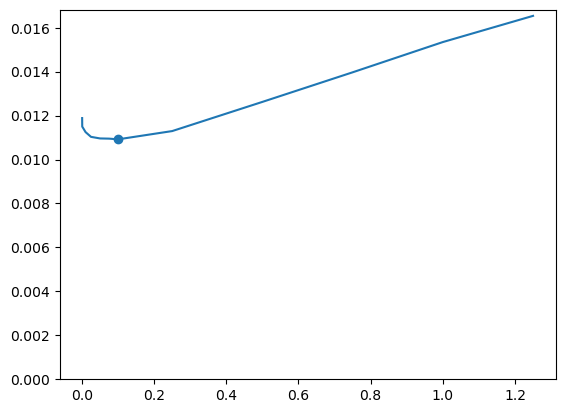

6    0.1
Name: length_scale_f, dtype: float64


In [52]:
param_name = 'length_scale_f'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}_med-2.csv')
print(rs_.shape)
print(np.unique(rs_['status'], return_counts = True))

# idx_ = (rs_['time'] == 144) #& ((rs_['status'] == 0) | (rs_['status'] == 3))
# rs_  = rs_.loc[idx_].reset_index(drop = True)
# print(rs_.shape)

rs_ = rs_[[param_name, 'WIS_eCDF']].rename(columns = {'WIS_eCDF': 'score'})

rs_agg_ = rs_.groupby([param_name]).agg('median').reset_index(drop = False)
print(rs_agg_)

plt.figure()
plt.plot(rs_agg_[param_name], rs_agg_['score'])
plt.scatter(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name], rs_agg_['score'].min())
plt.ylim(0, )
plt.show()

print(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name])

(43800, 17)
(array([0, 1, 2, 3, 4]), array([ 2564,  1908, 10957, 27999,   372]))
    forget_rate_e     score
0            0.20  0.011064
1            0.30  0.011046
2            0.40  0.011033
3            0.50  0.011021
4            0.60  0.011018
5            0.70  0.011017
6            0.80  0.011031
7            0.90  0.011036
8            1.00  0.011032
9            1.10  0.011045
10           1.20  0.011058
11           1.25  0.011053


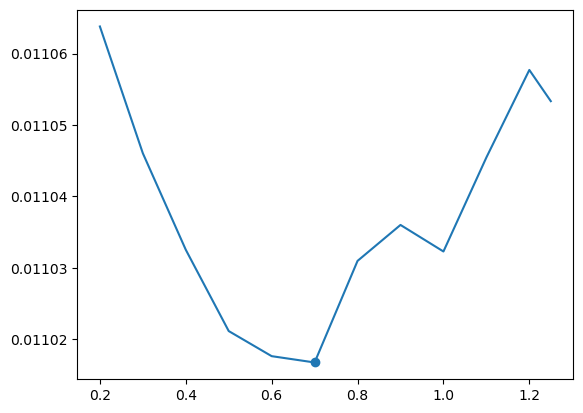

5    0.7
Name: forget_rate_e, dtype: float64


In [55]:
param_name = 'forget_rate_e'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}_med-2.csv')
print(rs_.shape)
print(np.unique(rs_['status'], return_counts = True))

# idx_ = (rs_['time'] == 144) #& ( (rs_['status'] == 0) | (rs_['status'] == 3))
# rs_  = rs_.loc[idx_].reset_index(drop = True)
# print(rs_.shape)

rs_ = rs_[[param_name, 'WIS_eCDF']].rename(columns = {'WIS_eCDF': 'score'})

rs_agg_ = rs_.groupby([param_name]).agg('median').reset_index(drop = False)
print(rs_agg_)

plt.figure()
plt.plot(rs_agg_[param_name], rs_agg_['score'])
plt.scatter(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name], rs_agg_['score'].min())
#plt.ylim(0, )
plt.show()

print(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name])

(43800, 17)
(array([0, 1, 2, 3, 4]), array([ 5659,  1152,  6166, 22888,  7935]))
    length_scale_e     score
0            0.010  0.012652
1            0.025  0.012014
2            0.050  0.011466
3            0.075  0.011361
4            0.100  0.011234
5            0.250  0.011033
6            0.500  0.011716
7            0.750  0.012213
8            1.000  0.012915
9            1.250  0.013216
10           1.500  0.013360
11           1.750  0.013464


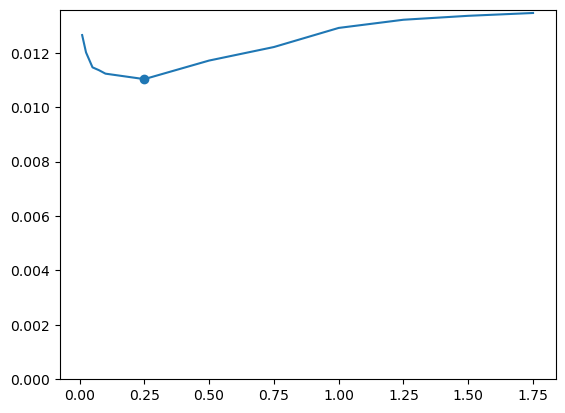

5    0.25
Name: length_scale_e, dtype: float64


In [56]:
param_name = 'length_scale_e'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}_med-2.csv')
print(rs_.shape)
print(np.unique(rs_['status'], return_counts = True))

# idx_ = (rs_['time'] == 144) #& ( (rs_['status'] == 0) | (rs_['status'] == 1) |(rs_['status'] == 2) | (rs_['status'] == 3))
# rs_  = rs_.loc[idx_].reset_index(drop = True)
# print(rs_.shape)

rs_ = rs_[[param_name, 'WIS_eCDF']].rename(columns = {'WIS_eCDF': 'score'})

rs_agg_ = rs_.groupby([param_name]).agg('median').reset_index(drop = False)
print(rs_agg_)

plt.figure()
plt.plot(rs_agg_[param_name], rs_agg_['score'])
plt.scatter(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name], rs_agg_['score'].min())
plt.ylim(0,)
plt.show()
print(rs_agg_.loc[rs_agg_['score'] == rs_agg_['score'].min(), param_name])